In [1]:
#import the necessary libraries(data manipulation, visualization, financial analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta
import pynance as pn

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

In [ ]:
# Load GOOG data from the yfinance_data directory
df = pd.read_csv("../yfinance_data/GOOG.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ticker = 'GOOG'
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = df[col].astype(float)

first_row = pd.DataFrame({
    'Open': [df['Open'].iloc[0]], 
    'High': [df['High'].iloc[0]], 
    'Low': [df['Low'].iloc[0]], 
    'Close': [df['Close'].iloc[0]], 
    'Volume': [df['Volume'].iloc[0]],
    'Ticker': [ticker]  # ticker in first row
}, index=[df.index[0]])

df['Ticker'] = None

df = pd.concat([first_row, df.iloc[1:]])

print(df.head())

                Open      High       Low     Close       Volume Ticker
2009-01-02  7.633949  7.960977  7.557264  7.948608  144961322.0   GOOG
2009-01-05  7.940692  8.194003  7.792268  8.115089  196293007.0   None
2009-01-06  8.237046  8.430492  8.074027  8.263762  257971329.0   None
2009-01-07  8.121770  8.185839  7.885034  7.965677  180453860.0   None
2009-01-08  7.873406  8.044340  7.850152  8.044340  144567852.0   None


In [10]:
# Clean column names if they are MultiIndex

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  
print("Cleaned columns:", df.columns.tolist())
df["Ticker"] = ticker

df_numeric_index = df[df.index != 'Ticker'].copy()
df_numeric_index.index = pd.to_datetime(df_numeric_index.index)
df_numeric_index = df_numeric_index.sort_index()

print(df_numeric_index.head())

Cleaned columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
                Open      High       Low     Close       Volume Ticker
2009-01-02  7.633949  7.960977  7.557264  7.948608  144961322.0   GOOG
2009-01-05  7.940692  8.194003  7.792268  8.115089  196293007.0   GOOG
2009-01-06  8.237046  8.430492  8.074027  8.263762  257971329.0   GOOG
2009-01-07  8.121770  8.185839  7.885034  7.965677  180453860.0   GOOG
2009-01-08  7.873406  8.044340  7.850152  8.044340  144567852.0   GOOG


In [11]:
# Basic Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())  
df.dropna(inplace=True)  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Close   3774 non-null   float64
 4   Volume  3774 non-null   float64
 5   Ticker  3774 non-null   object 
dtypes: float64(5), object(1)
memory usage: 206.4+ KB
None
              Open         High          Low        Close        Volume
count  3774.000000  3774.000000  3774.000000  3774.000000  3.774000e+03
mean     50.753534    51.285163    50.252347    50.779971  6.123096e+07
std      39.389736    39.853299    38.975050    39.417443  5.537396e+07
min       7.133018     7.408840     6.994490     6.994490  1.584340e+05
25%      16.827651    16.984424    16.699388    16.851089  2.574863e+07
50%      37.388390    37.647668    37.038786    37.327805  3.797798e+07
75%      69.06288

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_32908\1563598740.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


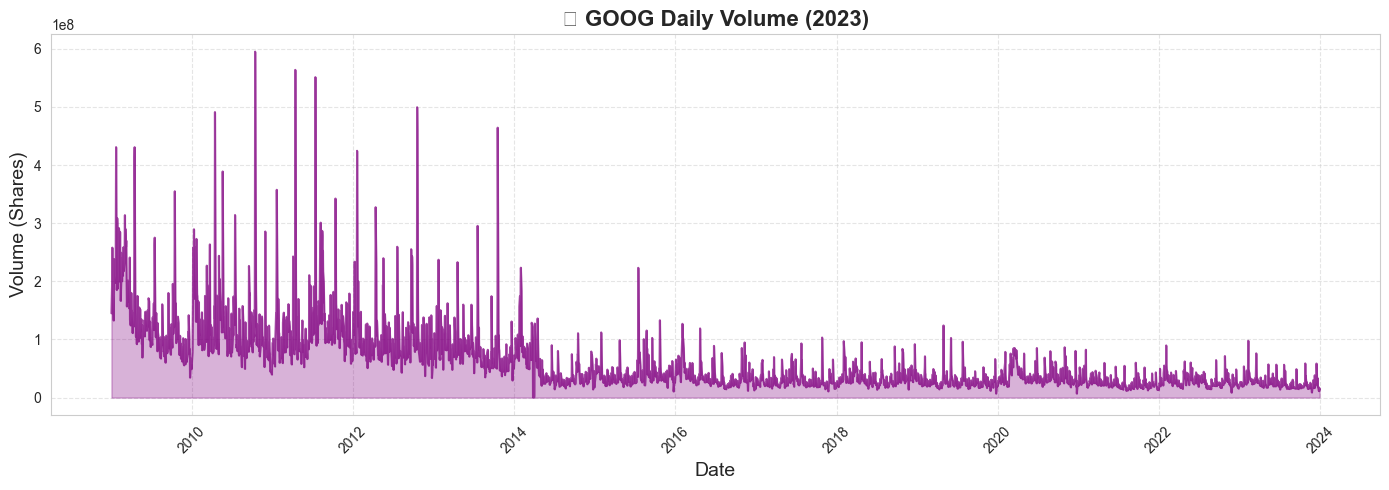

In [12]:
plt.figure(figsize=(14,5))
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df.dropna(subset=['Volume'], inplace=True) 
plt.fill_between(df.index, df['Volume'], color="purple", alpha=0.3)
plt.plot(df.index, df['Volume'], color="purple", alpha=0.7)
plt.title("📊 GOOG Daily Volume (2023)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume (Shares)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True) 
df['SMA20'] = df['Close'].rolling(window=20).mean()

df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()


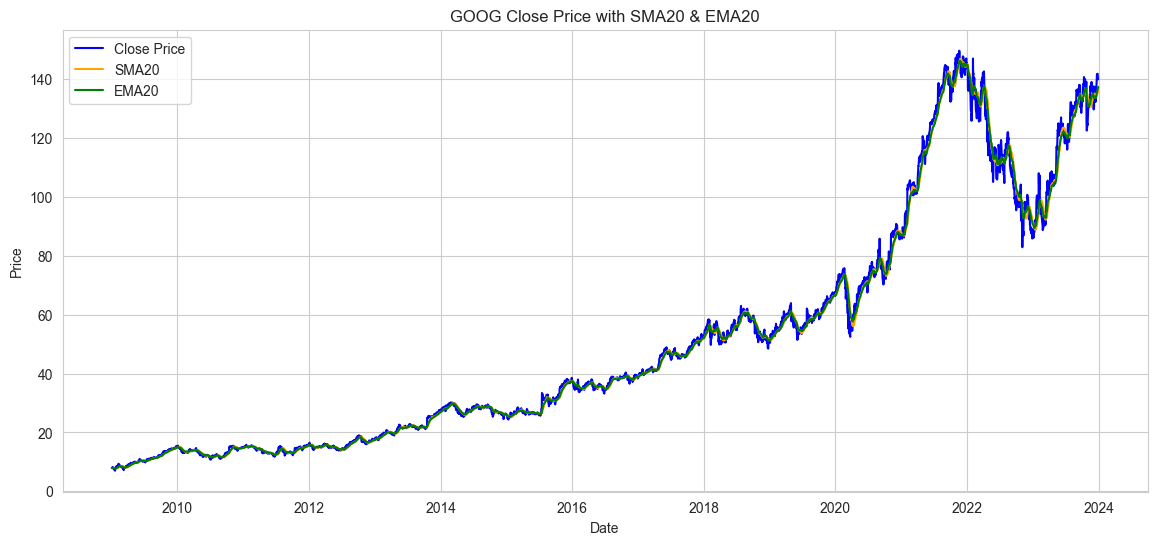

In [21]:
# SMA and EMA Plot 
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA20'], label='SMA20', color='orange')
plt.plot(df['EMA20'], label='EMA20', color='green')
plt.title('GOOG Close Price with SMA20 & EMA20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#RSI Indicator Plot
plt.figure(figsize=(14,4))
plt.plot(df['RSI14'], label='RSI14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI14 Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()
